In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

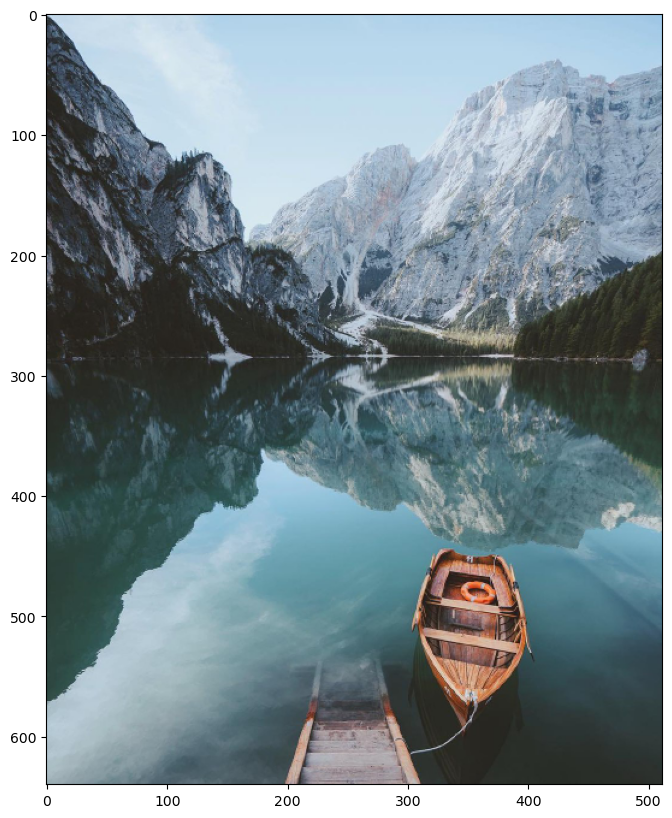

In [2]:
# Load image
img = cv2.imread('desktop/photo1.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
# Plot it
plt.imshow(img)

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

(<AxesSubplot: title={'center': 'Quantized image'}>,
 Text(0.5, 1.0, 'Quantized image'))

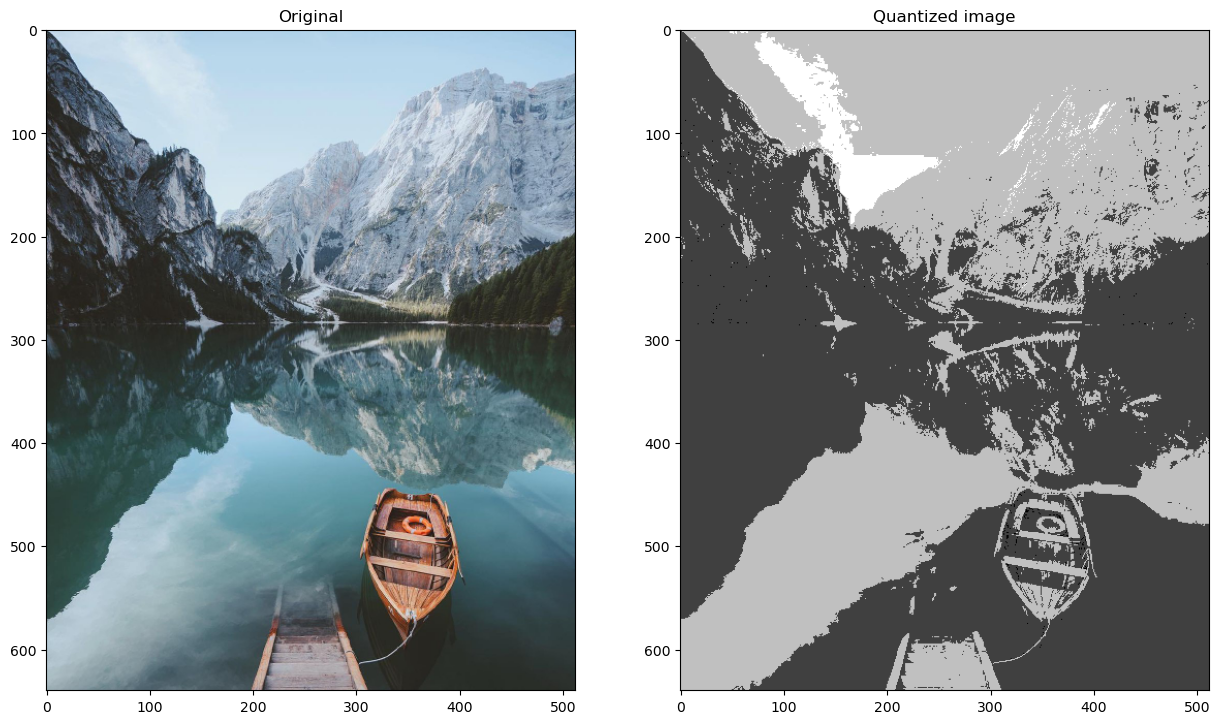

In [4]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        distance = np.linalg.norm(colors - pixel, axis=1)
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin(distance), :]
        
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
        
                     
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(img.astype(np.uint8)), plt.title('Original')
plt.subplot(122), plt.imshow(quantized.astype(np.uint8)), plt.title('Quantized image')
       

In [5]:
print("photo props: "+str(img.shape))

photo props: (640, 512, 3)


TypeError: Invalid shape () for image data

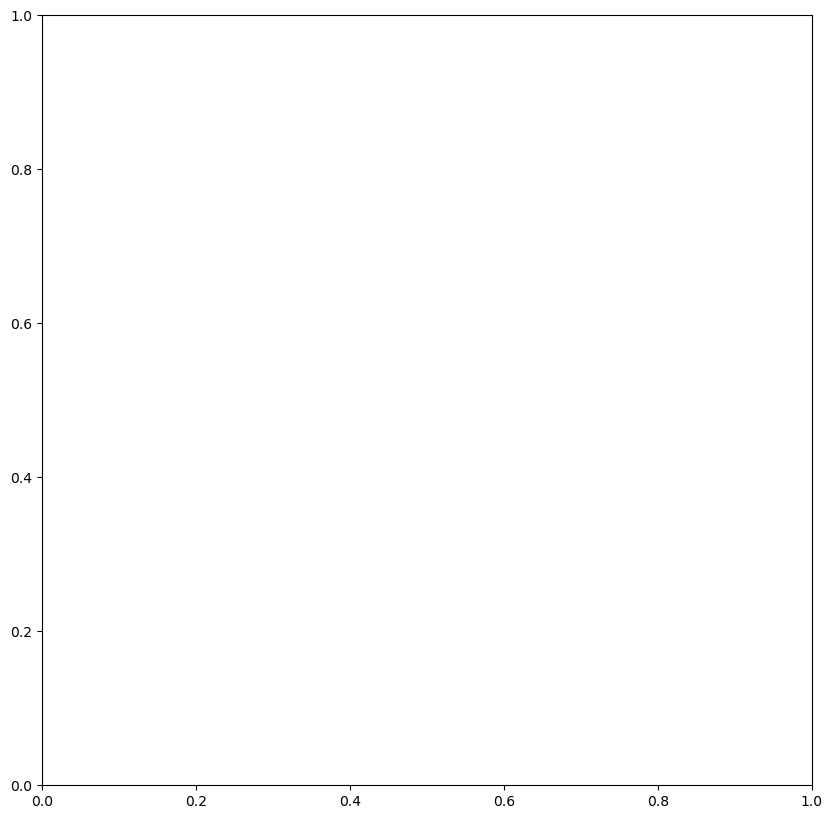

In [6]:
# Compute average quantization error
avg_quant_error = np.mean(img - quantized)
plt.imshow(avg_quant_error)

In [12]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

def find_closest_palette_color(pixel, colors):
    new_pixel = np.copy(pixel)
    min_distance = 1e6
    for i in range(len(colors)):
        dist = distance.euclidean(pixel, colors[i])
        
        if min_distance > dist:
            min_distance = dist
            new_pixel = color[i]
            
        return new_pixel
    
for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors)       
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r  , c,  :] = new_pixel
        img_tmp[r  , c+1,  :] = img_tmp[r  , c+1,  :] + quant_error * 0,4375
        img_tmp[r+1, c-1,  :] = img_tmp[r+1, c-1,  :] + quant_error * 0,1875
        img_tmp[r+1, c  ,  :] = img_tmp[r+1, c  ,  :] + quant_error * 0,3125
        img_tmp[r+1, c+1,  :] = img_tmp[r+1, c+1,  :] + quant_error * 1 / 16
        # Apply dithering
        dithering[r, c, :] = new_pixel
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering
# Compute average quantization error for dithered image
#avg_dith_error = 

AttributeError: 'numpy.ndarray' object has no attribute 'euclidean'